### <span style = "color:orange">1. Introduction<span>

#### <span style="color:green">1.1. Project purpose</span>

Xây dựng và đánh giá tập hợp các mô hình dự báo chuỗi thời gian để dự đoán nhiệt độ cực đại hàng ngày tại các khu vực đô thị và ven biển Việt Nam. Dự án áp dụng cả thuật toán Machine Learning truyền thống và Deep Learning hiện đại nhằm cải thiện độ chính xác dự báo so với các phương pháp thống kê thông thường.

<b>Nguồn dữ liệu</b>: Bộ dữ liệu ERA5 (ECMWF) với các bản ghi nhiệt độ từ 1990 đến 2024, được xử lý và biến đổi để huấn luyện các mô hình như Random Forest, XGBoost, LSTM, Transformer, TFT, và N-BEATS.

<b>Kết quả</b>: Đánh giá hiệu năng giữa các mô hình qua nhiều kịch bản thực nghiệm và đề xuất hệ thống cảnh báo nhiệt độ sớm ứng dụng thực tế.

#### <span style="color:green">1.2. Data source and description</span>

<h4>Thông tin dữ liệu trong đề tài:</h4>

<ul>
<li><b>Thời gian thu thập:</b> từ năm <b>1990 đến 2024</b></li>
<li><b>Định dạng ban đầu:</b> .grib, sau đó chuyển đổi sang .csv để xử lý</li>
</ul>

<h4>Các biến số chính trong tập dữ liệu:</h4>

<table>
<thead>
<tr>
<th>Tên cột dữ liệu</th>
<th>Ý nghĩa</th>
<th>Đơn vị đo</th>
</tr>
</thead>
<tbody>
<tr><td><code>NAME</code></td><td>Tên tỉnh/thành phố nơi thu thập dữ liệu</td><td>-</td></tr>
<tr><td><code>LATITUDE</code></td><td>Vĩ độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>LONGITUDE</code></td><td>Kinh độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>YMD</code></td><td>Ngày/tháng/năm đo đạc</td><td>dd/mm/yyyy</td></tr>
<tr><td><code>YEAR</code></td><td>Năm đo đạc</td><td>Năm</td></tr>
<tr><td><code>MONTH</code></td><td>Tháng đo đạc</td><td>Tháng</td></tr>
<tr><td><code>DAY</code></td><td>Ngày đo đạc</td><td>Ngày</td></tr>
<tr><td><code>TEMP_max</code></td><td>Nhiệt độ không khí cực đại trong ngày</td><td>°C</td></tr>
<tr><td><code>TEMP_ave</code></td><td>Nhiệt độ trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_ave</code></td><td>Điểm sương trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_max</code></td><td>Điểm sương cao nhất trong ngày</td><td>°C</td></tr>
<tr><td><code>RH_ave</code></td><td>Độ ẩm tương đối trung bình trong ngày</td><td>%</td></tr>
<tr><td><code>RH_max</code></td><td>Độ ẩm tương đối cực đại trong ngày</td><td>%</td></tr>
<tr><td><code>AT_ave</code></td><td>Nhiệt độ cảm nhận trung bình trong ngày (Apparent Temp.)</td><td>°C</td></tr>
<tr><td><code>AT_max</code></td><td>Nhiệt độ cảm nhận cao nhất trong ngày</td><td>°C</td></tr>
</tbody>
</table>

<p><b>Biến mục tiêu chính:</b></p>
<ul>
<li><code>TEMP_max</code> — Nhiệt độ không khí cực đại hàng ngày (°C)</li>
</ul>

<p><b>Lưu ý:</b> Dữ liệu gốc của ERA5 có thể chứa giá trị thiếu, giá trị ngoại lai và một số dị bản khí tượng đặc thù. Do đó, quá trình làm sạch dữ liệu, xử lý giá trị thiếu, phát hiện ngoại lệ và chuẩn hóa dữ liệu là các bước bắt buộc trước khi tiến hành huấn luyện và dự báo.</p>

In [1]:
match_type = {
    'NAME'       : 'Categorical',        # Tên tỉnh/thành phố (chuỗi)
    'LATITUDE'   : 'Numerical',          # Vĩ độ (°)
    'LONGITUDE'  : 'Numerical',          # Kinh độ (°)
    'YMD'        : 'Datetime',           # Ngày/tháng/năm (dd/mm/yyyy)
    'YEAR'       : 'Numerical',          # Năm (năm)
    'MONTH'      : 'Numerical',          # Tháng (1-12)
    'DAY'        : 'Numerical',          # Ngày (1-31)

    'TEMP_max'   : 'Numerical',          # Nhiệt độ cực đại trong ngày (°C)
    'TEMP_ave'   : 'Numerical',          # Nhiệt độ trung bình trong ngày (°C)
    'DEW_ave'    : 'Numerical',          # Điểm sương trung bình trong ngày (°C)
    'DEW_max'    : 'Numerical',          # Điểm sương cực đại trong ngày (°C)
    'RH_ave'     : 'Numerical',          # Độ ẩm tương đối trung bình trong ngày (%)
    'RH_max'     : 'Numerical',          # Độ ẩm tương đối cực đại trong ngày (%)
    'AT_ave'     : 'Numerical',          # Nhiệt độ cảm nhận trung bình trong ngày (°C)
    'AT_max'     : 'Numerical'           # Nhiệt độ cảm nhận cực đại trong ngày (°C)
}

#### <span style="color:green">1.3. Goals</span>

![Ảnh chụp màn hình 2025-06-24 210616.png](<attachment:Ảnh chụp màn hình 2025-06-24 210616.png>)

### <span style="color:orange">2. Import Libraries</span>

#### <span style="color:green">2.1. Configuration and display settings</span>

In [2]:
import sys
sys.path.append("../")  # đường dẫn đến thư mục chứa src

from src import (config, 
                 dataset, 
                 features, 
                 plots)

#### <span style="color:green">2.2. Required Python packages</span>

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metpy
import metpy.calc

from metpy.units import units
from copy        import deepcopy

### <span style="color:orange">3. Data Loading</span>

In [4]:
src = dict({"CaMau" :"../data/processed/datasets/CaMau90.24_cleaned.csv",
            "NB"    : "../data/processed/datasets/NB90.24_cleaned.csv",
            "QN"    : "../data/processed/datasets/QN90.24_cleaned.csv",
            "TSN"   : "../data/processed/datasets/TSN90.24_cleaned.csv"})

#### <span style="color:green">3.1. Loading the dataset</span>

In [6]:
df = pd.read_csv(filepath_or_buffer = src["CaMau"],
                 parse_dates        = True,
                 index_col          = "time")

#### <span style="color:green">3.2. Displaying first few rows</span>

In [7]:
df.head()

,latitude,longitude,number,step,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
time,,,,,,,,,,,,
1990-01-01 00:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 01:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 02:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 03:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 04:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024


In [8]:
df.tail()

,latitude,longitude,number,step,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
time,,,,,,,,,,,,
2025-01-01 09:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 10:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 11:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 12:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 13:00:00+07:00,9.18,105.15,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615


#### <span style="color:green">3.3. Data summary</span>

In [9]:
df.shape

(306830, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306830 entries, 1990-01-01 00:00:00+07:00 to 2025-01-01 13:00:00+07:00
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   latitude            306830 non-null  float64
 1   longitude           306830 non-null  float64
 2   number              306830 non-null  float64
 3   step                306830 non-null  object 
 4   surface             306830 non-null  float64
 5   sp                  306830 non-null  float64
 6   tcc                 306830 non-null  float64
 7   tp                  306830 non-null  float64
 8   u10                 306830 non-null  float64
 9   v10                 306830 non-null  float64
 10  wind_speed          306830 non-null  float64
 11  wind_direction_deg  306830 non-null  float64
dtypes: float64(11), object(1)
memory usage: 30.4+ MB


In [13]:
df.describe()

,latitude,longitude,number,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
count,3.068300e+05,3.068300e+05,306830.0,306830.0,306830.000000,306830.000000,306830.000000,306830.000000,306830.000000,306830.000000,306830.000000
mean,9.180000e+00,1.051500e+02,0.0,0.0,100974.948897,0.750857,0.009729,-0.274956,0.291744,2.834269,163.716477
std,5.329079e-15,7.105439e-14,0.0,0.0,213.505782,0.301445,0.013061,2.893074,1.230089,1.417958,87.374036
min,9.180000e+00,1.051500e+02,0.0,0.0,100511.767400,0.000000,0.000000,-9.211976,-2.933595,0.004248,0.006132
25%,9.180000e+00,1.051500e+02,0.0,0.0,100824.500000,0.548593,0.000569,-2.492012,-0.483519,1.721899,86.261094
50%,9.180000e+00,1.051500e+02,0.0,0.0,100962.625000,0.909145,0.004637,-0.372383,0.391136,2.648919,147.891674
75%,9.180000e+00,1.051500e+02,0.0,0.0,101113.940000,0.990941,0.013274,1.987964,1.149865,3.780096,246.692280
max,9.180000e+00,1.051500e+02,0.0,0.0,101521.606150,1.000000,0.062530,8.654032,3.599941,9.339478,359.996070


### <span style="color:orange">4. Exploratory Data Analysis (EDA)</span>

#### <span style="color:green">4.1. Explore Categorical Variables</span>

##### <span style="color:tomato">Summary Statistics</span>

In [15]:
categorical = df.select_dtypes(include='object').columns
print(f'There are {len(categorical)} categorical variables\n')
print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 Index(['step'], dtype='object')


Frequency counts

In [16]:
dataset.frequency_counts(df, categorical)

step
0 days    306830/306830
Name: count, dtype: object



Frequency distributions

In [17]:
dataset.frequency_distributions(df, categorical)

step
0 days    100.000000%
Name: count, dtype: object



#### <span style="color:green">4.2. Explore Numerical Variables</span>

##### <span style="color:tomato">Summary Statistics</span>

In [18]:
numerical = df.select_dtypes(include='number').columns
print(f'There are {len(numerical)} numerical variables')
print('The numerical variables are :\n\n', numerical)

There are 11 numerical variables
The numerical variables are :

 Index(['latitude', 'longitude', 'number', 'surface', 'sp', 'tcc', 'tp', 'u10',
       'v10', 'wind_speed', 'wind_direction_deg'],
      dtype='object')


Frequency counts

In [19]:
dataset.frequency_counts(df, numerical)

latitude
9.18    306830/306830
Name: count, dtype: object

longitude
105.15    306830/306830
Name: count, dtype: object

number
0.0    306830/306830
Name: count, dtype: object

surface
0.0    306830/306830
Name: count, dtype: object

sp
101521.60615    3069/306830
100511.76740    3069/306830
100918.62500      55/306830
100909.81000      54/306830
100891.69000      54/306830
                   ...     
101117.30000       1/306830
101114.15000       1/306830
101107.85000       1/306830
101092.10000       1/306830
100846.35000       1/306830
Name: count, Length: 25581, dtype: object

tcc
1.000000    38672/306830
0.999376     2464/306830
0.998340     1475/306830
0.999287     1469/306830
0.999290     1169/306830
                ...     
0.983983        1/306830
0.976112        1/306830
0.923986        1/306830
0.938151        1/306830
0.675623        1/306830
Name: count, Length: 222143, dtype: object

tp
0.000000    65746/306830
0.000517     3526/306830
0.000365     3170/306830
0.062530   

Frequency distributions

In [20]:
dataset.frequency_distributions(df, numerical)

latitude
9.18    100.000000%
Name: count, dtype: object

longitude
105.15    100.000000%
Name: count, dtype: object

number
0.0    100.000000%
Name: count, dtype: object

surface
0.0    100.000000%
Name: count, dtype: object

sp
101521.60615    1.000228%
100511.76740    1.000228%
100918.62500    0.017925%
100909.81000    0.017599%
100891.69000    0.017599%
                  ...    
101117.30000    0.000326%
101114.15000    0.000326%
101107.85000    0.000326%
101092.10000    0.000326%
100846.35000    0.000326%
Name: count, Length: 25581, dtype: object

tcc
1.000000    12.603722%
0.999376     0.803051%
0.998340     0.480722%
0.999287     0.478767%
0.999290     0.380993%
               ...    
0.983983     0.000326%
0.976112     0.000326%
0.923986     0.000326%
0.938151     0.000326%
0.675623     0.000326%
Name: count, Length: 222143, dtype: object

tp
0.000000    21.427501%
0.000517     1.149171%
0.000365     1.033145%
0.062530     1.000228%
0.000731     0.765571%
               ...    


### <span style="color:orange">5. Data Visualization</span>

#### <span style="color:green">5.1. Distribution Plots</span>

##### <span style="color:tomato">Histograms</span>

In [ ]:
# # cols_not_included = ["class"]
# num_cols = len(numerical) + len(categorical)

# # Xác định số hàng và số cột hợp lý
# ncols = 3  # Số biểu đồ trên mỗi hàng
# nrows = int(np.ceil(num_cols / ncols))  # Tính số hàng cần thiết

# fig, axes = plt.subplots(
#     ncols   = ncols, 
#     nrows   = nrows, 
#     figsize = (5*ncols, 4*nrows)
# )
# axes = axes.flatten()  # chuyển mảng 2 chiều thành 1 chiều để dễ duyệt

# for i,column in enumerate(numerical.append(categorical)):
#     sns.histplot(
#         data = train_df, 
#         x    = column,
#         kde  = True,
#         ax   = axes[i]
#     )
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')
#     axes[i].grid(True)

# # Ẩn các subplot dư nếu có
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

##### <span style="color:tomato">Box Plots</span>

In [ ]:
# script.plot_Outlier(train_df, numerical.append(categorical.drop("class")), target="class")

#### <span style="color:green">5.2. Relationship Plots</span>

##### <span style="color:tomato">Scatter</span>

In [ ]:
# sns.pairplot(
#     data = train_df,
#     hue  = "class"
# )

##### <span style="color:tomato">Bar Charts</span>

In [ ]:
# # cols_not_included = ["class"]
# num_cols = len(categorical) + len(numerical)

# # Xác định số hàng và số cột hợp lý
# ncols = 3  # Số biểu đồ trên mỗi hàng
# nrows = int(np.ceil(num_cols / ncols))  # Tính số hàng cần thiết

# fig, axes = plt.subplots(
#     ncols   = ncols, 
#     nrows   = nrows, 
#     figsize = (5*ncols, 4*nrows)
# )
# axes = axes.flatten()  # chuyển mảng 2 chiều thành 1 chiều để dễ duyệt

# for i,column in enumerate(categorical.append(numerical)):
#     sns.barplot(
#         data = train_df, 
#         x    = column,
#         y    = "class", 
#         ax   = axes[i]
#     )
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('class')
#     axes[i].grid(True)

# # Ẩn các subplot dư nếu có
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

#### <span style="color:green">5.3. Annotated Visualizations</span>

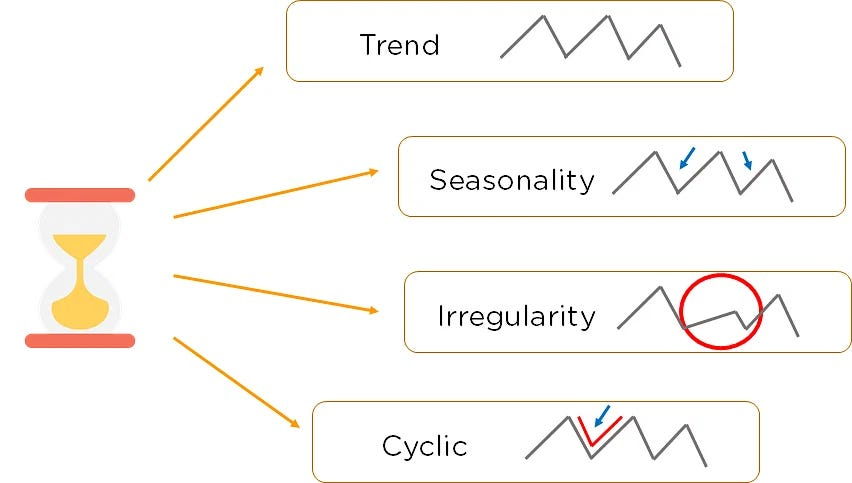 
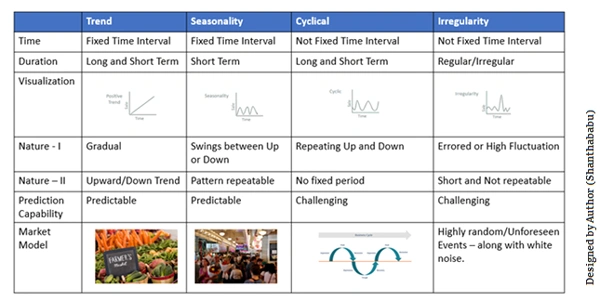

##### <span style="color:tomato">Trend</span>

##### <span style="color:tomato">Seasonal</span>

##### <span style="color:tomato">Cyclical</span>

##### <span style="color:tomato">Irregular</span>